In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def availability(stations, dates, matrix, source='simple'):
    fig = plt.figure(figsize=(6,10 * len(stations)/78))
    fig.subplots_adjust(bottom=.05,top=0.99)
    ax = plt.subplot()
    ax.xaxis_date()
    ax.pcolormesh(dates,np.arange(matrix.shape[0]+1),matrix)
    y = np.arange(matrix.shape[0])
    ax.set_yticks(y+1)
    if source == 'full':
        l = ax.set_yticklabels(['{} ({}m): {}'.format(s[2],s[3],s[0]) for s in stations])
    elif source == 'simple':
        l = ax.set_yticklabels(stations)
    elif source == 'DGA':
        l = ax.set_yticklabels(['{} / {}'.format(s[3],s[8]) for s in stations])
    for k in l:
        k.set_verticalalignment('bottom')
        k.set_fontsize(8)
    ax.yaxis.set_tick_params(tick1On=False)
    # ax.hlines(y,*ax.get_xlim())
    ax.grid()
    ax.invert_yaxis()

def variable(X, source='full'):
    x = X.notnull().groupby(X.index.date).aggregate(np.sum)
    availability(x.columns, x.index, x.as_matrix().T, source)

In [ ]:
import sys
sys.path.append('../python/')
from CEAZAMet import get_stations

stations = sorted(get_stations(), key=lambda s:s.code)

# By station / general

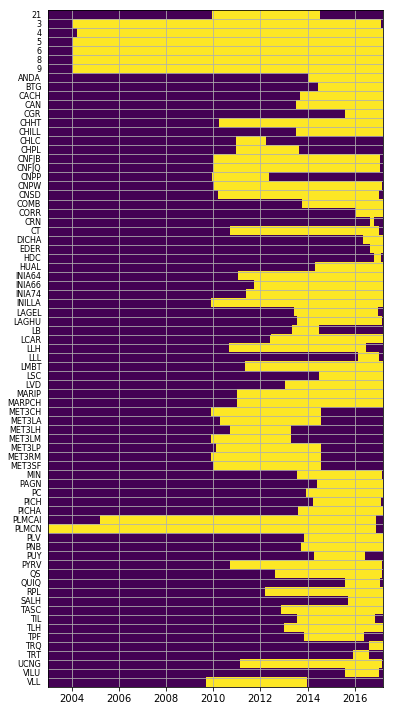

In [30]:
import numpy as np
k = np.array([[s.first,s.last] for s in stations], dtype='datetime64[D]')
d = np.arange(np.min(k), np.max(k) + np.timedelta64(1,'D'))
n = (k - d[0]).astype(int) + 1
m = np.zeros((n.shape[0],np.max(n)))
for i in range(n.shape[0]):
    m[i,n[i,0]:n[i,1]+1] = 1

availability([s.code for s in stations], d, m)

# By field

## Solar radiation (rs_w)

|   | SW down | SW up | LW down | LW up | LW net | Sol dif | Sol dir | Sol refl |
|:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 5      |         |       | x       |       | x      |         |         |          |
| 6      |         |       | x       |       |        | x       | x       |          |
| ANDA   |         |       | x       |       |        |         |         |          |
| COMB   |         |       | x       |       | x      | x       | x       |          |
| CT     | x       | x     | x       | x     |        |         |         |          |
| INILLA |         |       | x       |       | x      |         |         |          |
| LSC    |         |       |         |       |        | x       | x       |          |
| MIN    |         |       | x       |       | x      |         |         |          |
| PAGN   |         |       |         |       |        |         |         | x        |
| PC     |         |       | x       |       | x      |         |         |          |
| TPF    |         | x     | x       | x     |        |         |         |          |

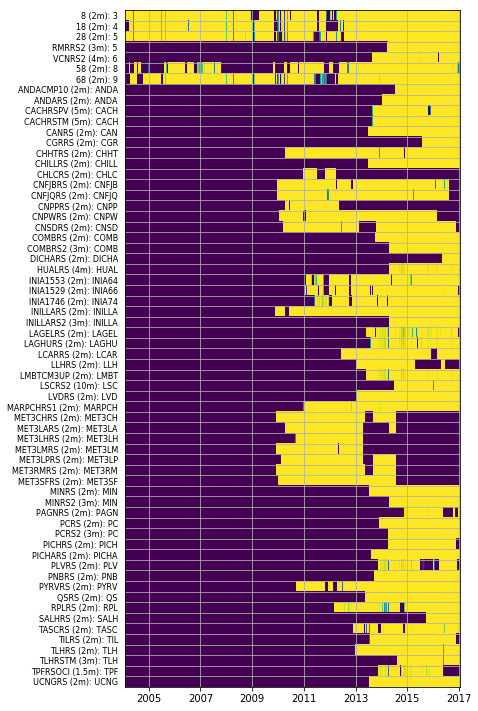

In [31]:
D = pd.HDFStore('../../data/tables/station_data_new.h5')
variable(D['rs_w'].xs('prom', level='aggr', axis=1))
D.close()

## Wind speed (vv_ms)

|      |     2 m | 5 m        | 10 m     |    30 m |
|-----:|:-------:|:----------:|:--------:|:-------:|
|    3 |       6 | PAZVV5     |          |         |
|    4 |      16 | 1117733106 |          |         |
|    5 |      26 | RMRVV5     |          |         |
|    6 |      36 | VCNVV5     |          |         |
|    8 |      56 | PEVV5      |          |         |
|    9 |      66 | RMPVV5     |          |         |
|  CGR |         | CGRVV5     | CGRVV10  |         |
| CHPL |  CHPLVV |            | CHPLVV10 |         |
| LCAR | LCARVV2 | LCARVV5    |          |         |
|  LLH | LLHVV2M |            | LLHVV10M |         |
|   QS |   QSVV2 |            | QSVV1    |         |
|  VLL |         |            | VLLVV10  | VLLVV30 |


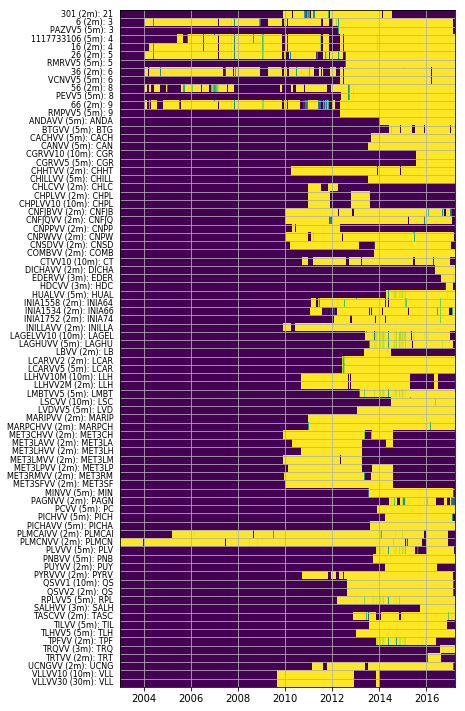

In [2]:
D = pd.HDFStore('../../data/tables/station_data_new.h5')
variable(D['vv_ms'].xs('prom', level='aggr', axis=1))
D.close()

## Precipitation

### pp_mm

In [6]:
import sys
sys.path.append('../python/')
import data
D = data.Data('../python/data.cfg')

In [7]:
D.open('d', 'station_data.h5')

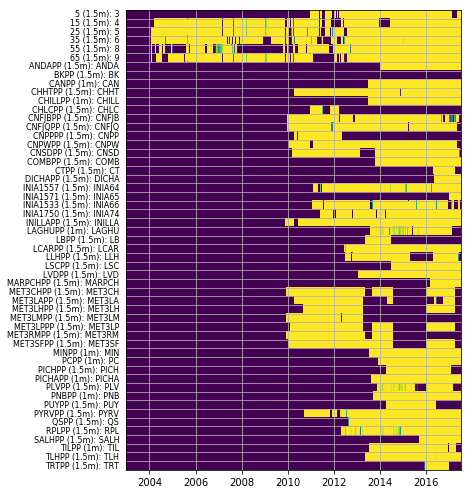

In [13]:
variable(D.d['pp_mm'].xs('prom', level='aggr', axis=1))

### ppa_mm

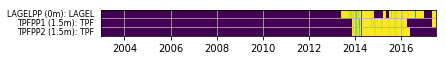

In [12]:
variable(D.d['ppa_mm'].xs('prom', level='aggr', axis=1))

### DGA

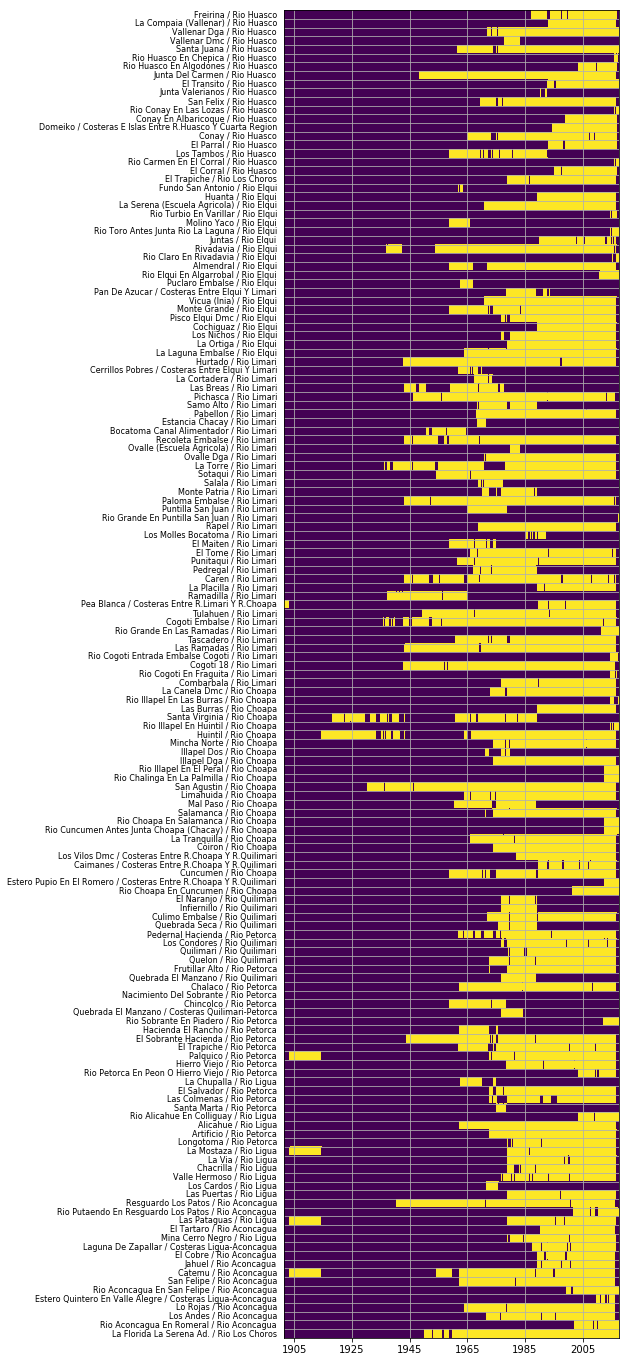

In [4]:
import sys
sys.path.append('../python/')
with pd.HDFStore('../../data/DGA/prDaily.h5') as d:
    variable(d['prDaily'], 'DGA')